This Notebook will mainly contain the code for the multi-class classification using TensorFlow.

# Project
## Introduction

In an era where data management is increasingly critical, the digitization and automated analysis of documents are at the forefront of technological advancement. This project aims to automate the processing of digitized images by developing an AI-based deep learning solution to generate descriptive captions, thereby improving the efficiency, management, and value of visual data.

## The TouNum company

**TouNum** specializes in converting paper documents into digital formats. The company aims to expand its services by integrating advanced **Machine Learning** and **Deep Learning** algorithms to automate the classification and caption generation for digitized images.

## Project overview

TouNum aims to develop an image **captioning** solution capable of analyzing and generating automatic captions. The project also includes **binary classification** to distinguish photos from other types of images. Pre-processing** will be required to improve image quality before processing by **deep learning** models.

**Objectives**

- **Image classification**: Develop a template to automatically distinguish photos from other types of images. 
- **Automatic caption generation**: Design a model combining **convolutional neural networks (CNN)** and **recurrent neural networks (RNN)** to generate descriptive captions from images.

**Challenges**
The project must meet the following challenges: 
- **Complex classification**: Distinguishing photos from other types of documents (**paintings**, **diagrams**, **sketches**, and **texts**,) is essential to avoid processing errors. 
- **Image quality**: Scanned images can vary in quality (blurred, noisy, ...), which can affect the performance of machine learning models.

**Deliverables**
1.	**Deliverable 1: Binary Classification (Week 3)**
    - Prototype classification model with a report detailing model performance.
2.	**Deliverable 2: Image pre-processing (Week 4)**
    - Implementation of image pre-processing techniques to improve image quality prior to analysis.
3.	**Deliverable 3: Image Captioning (Week 5)**
    - Complete model integrating binary classification and automatic legend generation, with results analysis.
4.	**Presentation (End of Project)**
    - A 20-minute presentation explaining the workflow, the results obtained, and a question-and-answer session with the TouNum committee.


This project represents an opportunity for **TouNum** to position itself as an innovative leader in digitization, by integrating **artificial intelligence** and **Machine Learning** solutions to improve the efficiency of its customers' visual data management.

<div style="text-align: center;">
  <img src="img/img/dscesiprojectdiagram.drawio_1.png" alt="Project Diagram" style="width:80%; height:auto; display: inline-block;"/>
</div>

## Environment initialization 
### Download requirements 

To ensure consistency across the project team and for anyone intending to execute the code, it is crucial to work within the same virtual environment. We use the `requirements.txt` file, which lists the necessary Python packages to be installed for the application to function correctly. By setting up this standardized environment, we avoid potential discrepancies and ensure that all dependencies are managed properly. To proceed, create and activate a virtual environment, then install the required packages listed in requirements.txt.



In [1]:
%pip install -q -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


### Import libraries
In the cell below, we import all the libraries that are neessary to run the code. We will explain what those libraries are for in the future when they are used.

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers
from tensorflow.keras.models import Sequential
from onedrivedownloader import download
import os
from py7zr import unpack_7zarchive
import shutil
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import PIL
from tensorboard.plugins.hparams import api
import datetime

2024-10-08 21:07:40.909017: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-08 21:07:40.965559: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-08 21:07:40.981189: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-08 21:07:41.083547: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-08 21:07:42.016399: W tensorflow/compiler/tf2

### Set up GPU
This code checks for available GPUs in the TensorFlow environment and enables memory growth for each GPU. This setting helps manage memory more efficiently during model training.

In [3]:
# import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0"

gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
if gpus:
    try:
        # Enable memory growth for each GPU
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        # Print the count of physical and logical GPUs
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
1 Physical GPUs, 1 Logical GPUs


I0000 00:00:1728414463.482657    4635 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728414463.605869    4635 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728414463.608242    4635 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728414463.611887    4635 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

## Data download
In this first delivrable, we will train our classification model on labeled data. Our team has made these data available in a [sharepoint](https://viacesifr-my.sharepoint.com/:u:/g/personal/arslane_ouldslimane_viacesi_fr/EYxF-OL6MXVIqY_Jps7fpGMBLUZzrsJajUZ3jHzgImkp_w?e=rvtSN6).

Let's download the zip file. It contains 6 folders with data: 

- 5 folders for Deliverable 1 (`Photo`, `Painting`, `Schematics`, `Sketch` and `Text`) 
- 1 folder for Deliverable 2 (`Dataset-L2`) 

During download, the file will be unzipped and we'll delete the Deliverable 2 folder, as we won't need it.

In [4]:
# Path where the downloaded file will be saved
filename = 'dataset/dataset.7z'
if not os.path.exists('./dataset'):
    # URL of the dataset to download
    url = 'https://viacesifr-my.sharepoint.com/:u:/g/personal/arslane_ouldslimane_viacesi_fr/EYxF-OL6MXVIqY_Jps7fpGMBLUZzrsJajUZ3jHzgImkp_w?e=rvtSN6'
    # Download the dataset from the specified URL and extract it
    download(
        url, 
        filename, 
        unzip=True,             # Automatically unzip the downloaded file
        force_unzip=True,       # Force unzip even if the path exists
        unzip_path='./datasets/',   # Path to extract the contents
        clean=True,             # Clean up temporary files after extraction
        )

    # unzip in python
    unpack_7zarchive(filename, './dataset/')
    # execution time: 12m 40sclass_labels = sorted(os.listdir('./dataset'))

In [5]:
# delete the 7z file
if os.path.exists(filename):
    os.remove(filename)

In [6]:
# delete deliverable 2 dataset
if os.path.exists('./dataset/Dataset-L2/'):
    shutil.rmtree('./dataset/Dataset-L2/')

## Data cleansing
### Deleting problem images
Some of the images provided may pose a problem when training our future model.

Although our data is correctly labeled, our team was able to identify a few anomalies.

Firstly, some files are corrupted (mime type error). For example, some files with a `jpg` extension were encoded as a `png` extension.

In addition, we were able to find grayscale images in our data. They are distinct from one-bit bi-tonal black-and-white images, which, in the context of computer imaging, are images with only two colors: black and white (also called bilevel or binary images). In our model, we want to process color images.

Recently, the `Sketch` folder contained 2 types of images. Sketches of faces, but also non-realistic drawings of objects, as you can see below:

<div style="text-align: center;">
  <img src="img/img/000_1_1_sz1.jpg" alt="Image 1" style="width: 200px; height: auto; display: inline-block;" />
  <img src="img/img/1.png" alt="Image 2" style="width: 200px; height: auto; display: inline-block;" />
</div>

The presence these drawings in the `Sketch` class introduces noise into the dataset, which can mislead the model during training. The model might struggle to differentiate between real sketches and drawings, reducing its ability to accurately classify images as sketches. This issue becomes more problematic considering the already limited number of samples in the `Sketch` class that we will see afterwards, making the class even more underrepresented and more prone to misclassification.

To prevent the model from learning incorrect patterns or associating incorrect features with sketches, it is crucial to clean the data by removing these drawings. This cleaning process will ensure that the images belonging to the `Sketch` class are all of similar nature and style.

Moreover, the grayscale images should either be converted to color or excluded from the dataset to maintain uniformity, as the model is designed to process color images only.

However, converting to colors may corupt the images. The same goes with modifying the mime type of the mismatch mime types images.

For that matter, we decided to delete all these problematic data. The code used for cleaning our data can be found in the python file `images_check.py` hat we import below. The cleaned dataset will be placed in another folder called `dataset_clean`.

In [7]:
from images_check import clean_dataset

# Define input and output paths for the dataset
if not os.path.exists('dataset_clean/'):
    input_path = 'dataset/'
    output_path = 'dataset_clean/'
    # Clean the dataset by removing unwanted images
    clean_dataset(input_path, output_path)

### Images preprocessing
Our images come in various shapes and sizes, which can pose challenges when training a machine learning model. Inconsistent dimensions can lead to complications in the data pipeline, as neural networks require fixed-size input. 

By resizing the images to a uniform size of 120x120 pixels, we ensure that each image is processed in the same way, making it easier for the model to learn from the data. This uniformity allows the model to focus on learning features relevant to classification without being affected by variations in image dimensions. Moreover, batching the data with a size of 32 optimizes the training process by leveraging vectorized operations, improving the speed and efficiency of computations. 

Ultimately, thorough preprocessing enhances the model's ability to generalize well to unseen data, ensuring that it performs reliably in real-world applications.

In the following code, each image will be resized to `120 pixels in width` and `120 pixels in height`.

We will be using `tf.keras.preprocessing.image_dataset_from_directory` to loads images from the specified directory. It automatically labels the images based on the names of the subdirectories.

In [8]:
# Set image dimensions and batch size
image_w = 120
image_h = 120
batch_s = 32

# Path to the cleaned dataset
dir_path = './dataset_clean/'

# Load the cleaned dataset from the specified directory
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dir_path,
    seed=42,            # Seed for randomization
    image_size=(image_h, image_w),  # Resize images to the specified dimensions
    batch_size=batch_s,     # Set the batch size
    label_mode='categorical',       # Use categorical labels for multi-class classification
)

Found 40284 files belonging to 5 classes.


## Data analysis
Now that our dataset has been cleaned of any sources of noise, let's analyze the distribution of images across different classes.

The following code will help us visualize the number of images per class in the cleaned dataset.

This visualization will helps us understand if any class has significantly more or fewer images than the others, which is known as __class imbalance__. A significant imbalance can lead to poor model performance, especially for underrepresented classes, so this step is key to determine if techniques like data augmentation or class weighting are needed.

Painting: 9894
Photo: 9968
Schematics: 9884
Sketch: 538
Text: 10000


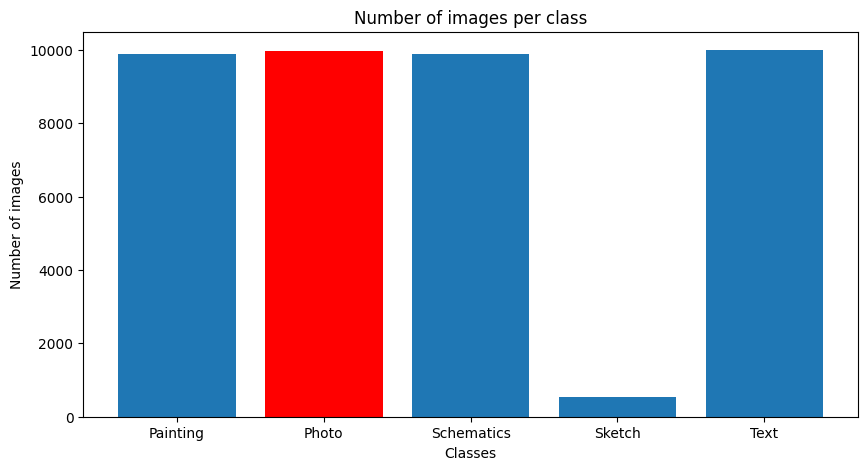

In [9]:
# Get the sorted list of class labels (subdirectory names) from the dataset directory
class_labels = sorted(os.listdir(dir_path))
class_labels        # Display the class labels

# count the number of images per class
count = {}      # Initialize an empty dictionary to hold counts
for label in class_labels:
    # Count the number of images in each class directory and store it in the count dictionary
    count[label] = len(os.listdir(dir_path + label))
    # Print the class label along with its corresponding image count
    print(f'{label}: {count[label]}')
    
# plot the number of images per class
plt.figure(figsize=(10, 5))
plt.bar(count.keys(), count.values())
# red for 'Photo' label
plt.bar('Photo', count['Photo'], color='red')
plt.xlabel('Classes')
plt.ylabel('Number of images')
plt.title('Number of images per class')
plt.show()

The results show us that the classes `Painting`, `Photo`, `Schematics`, `Text` have approximately 10 000 images each when `Sketch` is notably underrepresented, with fewer than 1 000 images.

In a multiclass classification problem, this under-representation can lead to poor classification for this class.

We can use techniques such as oversampling (duplicating samples from the Sketch class), data augmentation (creating variations of the Sketch images), or class weighting (assigning more importance to the Sketch class during training) to address this imbalance.


Let's take a look at the first batch 1 images.

2024-10-08 21:07:45.864946: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


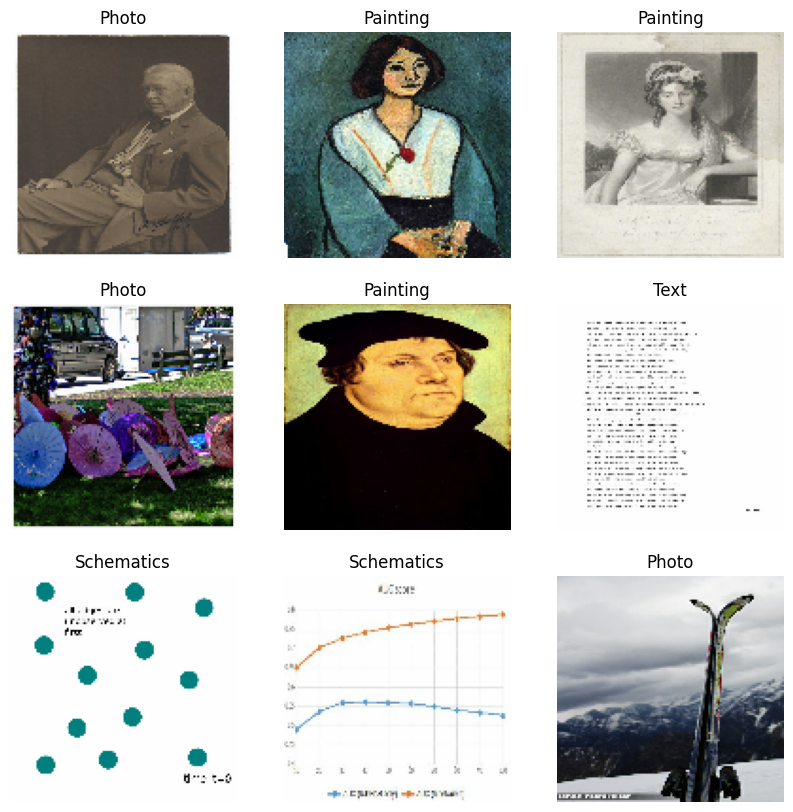

In [10]:
# Function to visualize a grid of sample images from the dataset, displaying their respective class names
def plot_class_images(dataset, class_names):
    plt.figure(figsize=(10, 10))    # Set the figure size for the plot
    for images, labels in dataset.take(1):      # Take one batch of images and labels from the dataset
        labels = labels.numpy()  # Convert tensor labels to numpy array
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)       # Create a 3x3 grid for the images
            plt.imshow(images[i].numpy().astype("uint8"))   # Display the image
            plt.title(class_names[labels[i].argmax()])  # Use argmax to get the class index
            plt.axis("off")     # Hide the axis for better visualization

# Plot the first 9 images with their class names
plot_class_images(dataset, class_labels)

In [11]:
# clear the dataset
dataset = None

### Dataset separation 

In this section, we define a `split_dataset` function to divide our image dataset into training and test sets. This function builds on TensorFlow's `image_dataset_from_directory` method to load and preprocess images from a directory while automatically partitioning the dataset into training and validation subsets. The dataset is divided according to a given ratio, with the ability to control parameters such as image size, batch size and the type of labels returned.


__Function details__ : 
- **Arguments** : 
- `dir_path`: Path to the directory containing the dataset, where images are organized into subdirectories representing each class. 
- `image_h`, `image_w`: Target height and width for image resizing. 
- `batch_s` : Batch size for model training. 
- `split`: The percentage of the dataset to be allocated to validation (default value is 20%).

**Returns** : 
- `train_set`: A TensorFlow dataset containing the training data. 
- `test_set` : A TensorFlow dataset containing validation data.

By dividing the dataset using this function, we ensure that the model is trained and evaluated on distinct subsets of the data, thus avoiding overfitting and guaranteeing a fair assessment of model performance.

In [12]:
def split_dataset(dir_path, image_h, image_w, batch_s, split=0.2):
    # split the dataset into training and testing
    train_set = tf.keras.preprocessing.image_dataset_from_directory(
        dir_path,
        validation_split=split,
        subset='training',
        seed=42,
        image_size=(image_h, image_w),
        batch_size=batch_s,
        label_mode='categorical',
    )

    test_set = tf.keras.preprocessing.image_dataset_from_directory(
        dir_path,
        validation_split=split,
        subset='validation',
        seed=42,
        image_size=(image_h, image_w),
        batch_size=batch_s,
        label_mode='categorical',
    )
    return train_set, test_set

train_set, test_set = split_dataset(dir_path, image_h, image_w, batch_s)

Found 40284 files belonging to 5 classes.
Using 32228 files for training.
Found 40284 files belonging to 5 classes.
Using 8056 files for validation.


### Training environment setup

In this section, you'll use the [`Dataset.cache`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#cache) and [`Dataset.prefetch`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch) functions to configure data to improve performance as follows: 

- `Dataset.cache()`: This function is used to force data to be cached in memory. As the neural network makes several passes (called _epoch_) over the data during training, this function avoids having to reload the images each time. 
- `Dataset.prefetch()`: This function preprocesses the current element of the dataset (e.g. the next batch) at the same time as the model trains/evaluates the current batch. In a multi-processor or multi-core environment, this saves considerable time.

In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_set = train_set.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_set = test_set.cache().prefetch(buffer_size=AUTOTUNE)

### Define class weights
This section defines a `set_class_weights` function to manage class imbalance in the dataset that we saw previously, by assigning appropriate weights to each class during model training. This ensures that under-represented classes, such as the "Sketch" class, are given more weight, helping the model to learn more efficiently from the minority class data.

**Libraries used** : 
- `compute_class_weight` from `sklearn.utils` : This function automatically calculates the weights of each class based on the frequency of their appearance in the data, assigning a higher weight to under-represented classes in order to better balance the learning process.

In [14]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

def set_class_weights(dir_path):
    # Get class labels from dataset
    class_labels = sorted(os.listdir(dir_path))
    print("Classes:", class_labels)

    # Count the number of images per class
    count = {}
    for label in class_labels:
        count[label] = len(os.listdir(dir_path + label))
        print(f'{label}: {count[label]}')

    # Compute class weights to handle imbalance
    class_weights = compute_class_weight(
        class_weight='balanced',
        classes=np.unique(class_labels),
        y=[label for label in class_labels for _ in range(count[label])]
    )

    # Assign class weights
    return {i: class_weights[i] for i in range(len(class_labels))}

class_weight_dict = set_class_weights(dir_path)
print("Class Weights:", class_weight_dict)

Classes: ['Painting', 'Photo', 'Schematics', 'Sketch', 'Text']
Painting: 9894
Photo: 9968
Schematics: 9884
Sketch: 538
Text: 10000
Class Weights: {0: 0.8143117040630685, 1: 0.8082664526484751, 2: 0.8151355726426548, 3: 14.97546468401487, 4: 0.80568}


## The model

## Setting up the model
In this notebook, we aim to enable our AI model to recognize the type of image (its class) among various images. Thus, we want to build a neural network that will analyze images efficiently, achieving good performance in a reduced time.

Convolutional neural networks (CNNs) are more suitable for computer vision tasks. They are specifically designed to process visual data by exploiting the spatial structure of images, reducing parameter complexity, and allowing hierarchical and progressive feature extraction. They also offer better robustness to translations and superior performance compared to traditional neural networks.

The operation of a CNN relies on several types of layers: **convolutional layers**, **pooling layers**, and **fully connected layers**.

<div style="text-align: center;">
  <img src="img/img/conv.png" alt="alt text" style="width: 50%;"/>
</div>

Convolutional layers apply filters to input images to extract local features, such as edges and textures. This works as follows:

<div style="text-align: center;">
  <img src="img/img/filter_cnn.png" alt="alt text" style="width: 50%;"/>
</div>

The goal is to use the values present in the filter at each step. For example, if we define a 3x3 window, it will represent 9 cells of the array (i.e., 9 pixels). The convolution will perform an operation with these 9 pixels. It can be any operation, for example, extracting the largest value (i.e., the pixel with the highest value).

<div style="text-align: center;">
  <img src="img/img/argmax.png" alt="alt text" style="width: 50%;"/>
</div>

We slide the orange window, and at each step, we retrieve the largest value among the 9 pixel values.
We notice that the output of the convolution, which we can call the "feature map," has smaller dimensions than the input image.

Next, pooling layers are used to reduce the size of the feature maps, which decreases the number of parameters and computational cost while retaining essential information.

<div style="text-align: center;">
  <img src="img/img/max-pooling.png" alt="alt text" style="width: 50%;"/>
</div>

The filter window moves two pixels to the right (stride/step = 2) and at each step retrieves the `argmax` corresponding to the largest of the 4 pixel values.

<div style="text-align: center;">
  <img src="img/img/down-samping.png" alt="alt text" style="width: 50%;"/>
</div>

Finally, fully connected (or dense) layers take the flattened feature maps as input and predict the image class based on the information extracted by the previous layers.

CNNs often outperform traditional models, such as multilayer neural networks or methods based on manual features, due to their ability to automatically learn discriminative features. One of the main reasons for their effectiveness is that they use a reduced number of parameters compared to traditional neural networks.

In a traditional neural network, each neuron in a layer is connected to all neurons in the previous layer, leading to an exponential number of parameters as the number of layers and neurons increases. In contrast, CNNs exploit the weight-sharing of filters across the entire image. For example, a convolution filter is applied to different regions of the image, meaning the same set of parameters (or weights) is used to extract local features from each region. This significantly reduces the total number of parameters in the model, making training easier, especially in contexts where training data is limited.

Moreover, this reduction in the number of parameters allows CNNs to be faster to train and require less memory, making it possible to deploy them on devices with limited resources. By reducing model complexity while maintaining the ability to learn complex relationships in the data, CNNs improve generalization.

When designing a CNN, several parameters must be considered.

Hyperparameters to optimize model performance:
- Filter size
- Number of filters per layer
- Learning rate
- Number of training epochs

The activation function, such as ReLU (Rectified Linear Unit), is often used to introduce non-linearity, allowing the model to better learn complex relationships in the data.

Regularization techniques help prevent overfitting and stabilize learning. These include:
- Dropout
- Batch normalization

Finally, the choice of optimizer (e.g., Adam, RMSprop) also influences the speed and efficiency of model convergence during training.


### Data augmentation

In this section, we define a data augmentation pipeline using TensorFlow's Sequential model to enhance the training dataset. The augmentation includes three key transformations:

* **RandomFlip**: This layer randomly flips images horizontally, helping the model learn to recognize features regardless of their orientation.

* **RandomRotation**: This layer randomly rotates images by up to 10%, introducing variability in angle and aiding the model in generalizing better to different orientations of objects.

* **RandomZoom**: This layer randomly zooms into images by 10%, which helps the model learn to focus on different parts of the image and improves robustness to scale variations.

Together, these augmentations increase the diversity of the training dataset, leading to better model performance and generalization.

In [15]:
# Define a data augmentation pipeline
data_augmentation = tf.keras.Sequential(
  [
    layers.RandomFlip(
                      "horizontal",   # Horizontal flip for orientation variability
                      input_shape=(image_h, image_w, 3)   # Input shape
                      ), 
    layers.RandomRotation(0.1),   # Rotate images by up to 10%
    layers.RandomZoom(0.1)    # Zoom into images by up to 10%
  ]
)

/home/arslane/Documents/CESI/DataScience/projet/data_science_project/.venv/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Premier modèle de classification multiclasse

In [16]:
# Hyperparameters for logging with TensorBoard
HP_DROPOUT = api.HParam('dropout', api.RealInterval(0.0, 0.5)) # Dropout rate
HP_LEARNING_RATE = api.HParam('learning_rate', api.Discrete([1e-2, 1e-3, 1e-4]))    # Learning rate
METRIC_ACCURACY = 'accuracy'    # Metric to monitor

In [17]:

def generate_model(optimizer='adam', dropout=0.0):
    # Create a Sequential model
    model = Sequential([
        data_augmentation,       # Apply data augmentation to the input images
        layers.Rescaling(1./255, input_shape=(image_h, image_w, 3)),   # Normalize pixel values to [0, 1]
        layers.Conv2D(16, (3, 3), padding='same', activation='relu'),  # First convolutional layer with ReLU activation
        layers.MaxPooling2D(),      # Max pooling to reduce spatial dimensions
        layers.Conv2D(32, (3, 3), padding='same', activation='relu'),  # Second convolutional layer with ReLU activation
        layers.MaxPooling2D(),
        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),  # Third convolutional layer with ReLU activation
        layers.MaxPooling2D(),
        layers.Dropout(dropout),        # Dropout layer to prevent overfitting
        layers.Flatten(),       # Flatten the output for the dense layers
        layers.Dense(128, activation='relu'),       # Fully connected layer with ReLU activation
        layers.Dense(5, activation='softmax')       # Output layer for binary classification, using sigmoid activation to produce a probability.
    ])

    # Compile the model with specified optimizer, loss function, and metrics
    model.compile(
                    optimizer=optimizer,
                    loss='categorical_crossentropy',    # Loss function for multi-class classification
                    metrics=['accuracy'],
                  )
    
    return model

* **Sequential Model:** The model is built using the Sequential API, which allows us to add layers one by one in a linear fashion. It is simple and intuitive when constructing a model where each layer has exactly one input tensor and one output tensor.

* **Data Augmentation:** We've applied random transformations such as flips, rotations, and zooms to the training images. This technique improves generalization by generating slightly modified versions of the original dataset, which makes the model more robust to variations in data.

* **Rescaling Layer:** This layer normalizes the pixel values of the images from the [0, 255] range to [0, 1], which helps in better model convergence. This normalization makes gradient descent more stable by ensuring that the data is on a consistent scale.

* **Convolutional Layers:**
  * We use **three convolutional layers** in the model, each followed by max-pooling. These layers are used to detect and learn patterns from images.

  * Why 16, 32, and 64 filters?

    **16, 32, 64 filters:** The number of filters increases with each convolutional layer. This is a common pattern to capture more complex features as the layers get deeper. In the initial layers, we look for basic patterns (edges, colors), and in deeper layers, we learn more abstract patterns (shapes, objects).

   **3x3 kernel:** The 3x3 kernel (or filter) size is standard for many CNN architectures because it allows the network to capture small, localized features in the images while keeping the number of parameters manageable.

  * **Padding='same':** This ensures that the output feature map has the same spatial dimensions (height and width) as the input. It adds zeros around the borders of the input image to avoid shrinking the output too quickly. This is important for preserving image information, especially in deeper networks.

  * **Activation Function: ReLU (Rectified Linear Unit):** ReLU is a non-linear activation function that replaces all negative values with 0. It's computationally efficient and introduces non-linearity to the model, enabling the network to learn complex patterns. This activation function helps mitigate the vanishing gradient problem.

* **MaxPooling:**
This layer reduces the spatial dimensions of the feature maps by taking the maximum value from a region (usually 2x2), effectively downsampling the data. It retains the most important features while reducing the computational complexity, and helps prevent overfitting by creating more abstract representations.

* **Dropout (dropout=0.0 by default):** Dropout is a regularization technique that randomly "drops" (disables) a fraction of neurons during training, which forces the model to not rely too much on specific neurons, improving generalization and reducing overfitting. The default value here is 0, but this can be increased to add more regularization when needed.

* **Flattening:** The feature maps output from the convolutional layers are 2D matrices. Flattening converts these 2D matrices into a 1D vector, making them suitable for input to fully connected (Dense) layers. This step bridges the gap between convolutional layers and dense layers.

* **Dense (Fully Connected) Layers:**
  * The first dense layer contains 128 units with ReLU activation, which helps in learning complex representations from the flattened input.
  * The second dense layer has 5 units with a Softmax activation function, as the model is performing multi-class classification.

* **Softmax:** The softmax function turns the raw outputs into probabilities for each class, summing to 1. It’s used in the final layer for multi-class classification to assign probabilities to each of the 5 classes in our dataset.
    

* **Layer Count:**
  * **Total Layers:**
    1 Data Augmentation
    1 Rescaling
    3 Convolutional Layers
    3 MaxPooling Layers
    1 Dropout Layer
    1 Flatten Layer
    2 Dense Layers
  * In total, we have **12 layers**, designed to progressively extract features from the images, downsample the spatial dimensions, prevent overfitting, and perform classification.

In [18]:
# Setting up the TensorBoard log directory and callback
log_dir = os.path.join("logs", "hparam_tuning")   # Log directory for TensorBoard
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)  # TensorBoard callback for visualization
hparams_callback = api.KerasCallback(log_dir, {
    HP_DROPOUT: 0.3,  # Example value
    HP_LEARNING_RATE: 1e-3
})

Now, we will initialize our model with the **Adam (Adaptive Moment Estimation)** optimizer, which is an optimization algorithm that adjusts the learning rate for each parameter based on the first and second moments of the gradients. This adaptability allows for faster convergence and better performance, especially in complex training scenarios.

We use it with a learning rate of 0.001 in this model because it stabilizes convergence and effectively manages the complexities of image classification tasks.

In [19]:
model1 = generate_model(optimizer = tf.keras.optimizers.Adam(0.001))   # Generate a model with default hyperparameters
model1.summary()    # Display the model summary


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 120, 120, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 120, 120, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 120, 120, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 60, 60, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 60, 60, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,843,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,867,557 (7.12 MB)

 Trainable params: 1,867,557 (7.12 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 30     # Number of epochs for training

history1 = model1.fit(   # Train the model with the training set
    train_set,
    epochs=epochs,
    validation_data=test_set,
    class_weight=class_weight_dict,
    callbacks=[tensorboard_callback, hparams_callback]  # Add the TensorBoard callback for visualization
)

Epoch 1/30


Corrupt JPEG data: 419 extraneous bytes before marker 0xd9
2024-10-08 15:20:18.829488: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:27: Filling up shuffle buffer (this may take a while): 459 of 1000


### Display results
Now that our model has been trained with our training dataset, let's plot the accuracy and loss curves over the epochs to visualize the model's performance on the training and validation sets.

This will allow us to evaluate the learning progression and detect potential issues such as overfitting or underfitting, as well as visualize noise in our model (oscillations). If the validation and training curves diverge too much, it could indicate that the model is not generalizing well to new data. The table below shows how to recognize these situations and how to address them:

<div style="text-align: center;">
  <img src="img/img/over_under_fit.webp" alt="alt text" style="width: 70%;"/>
</div>

This observation is essential for adjusting hyperparameters and improving the overall performance of the model.

In [20]:
def plot_history(history, epochs=5):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    
    plt.show()

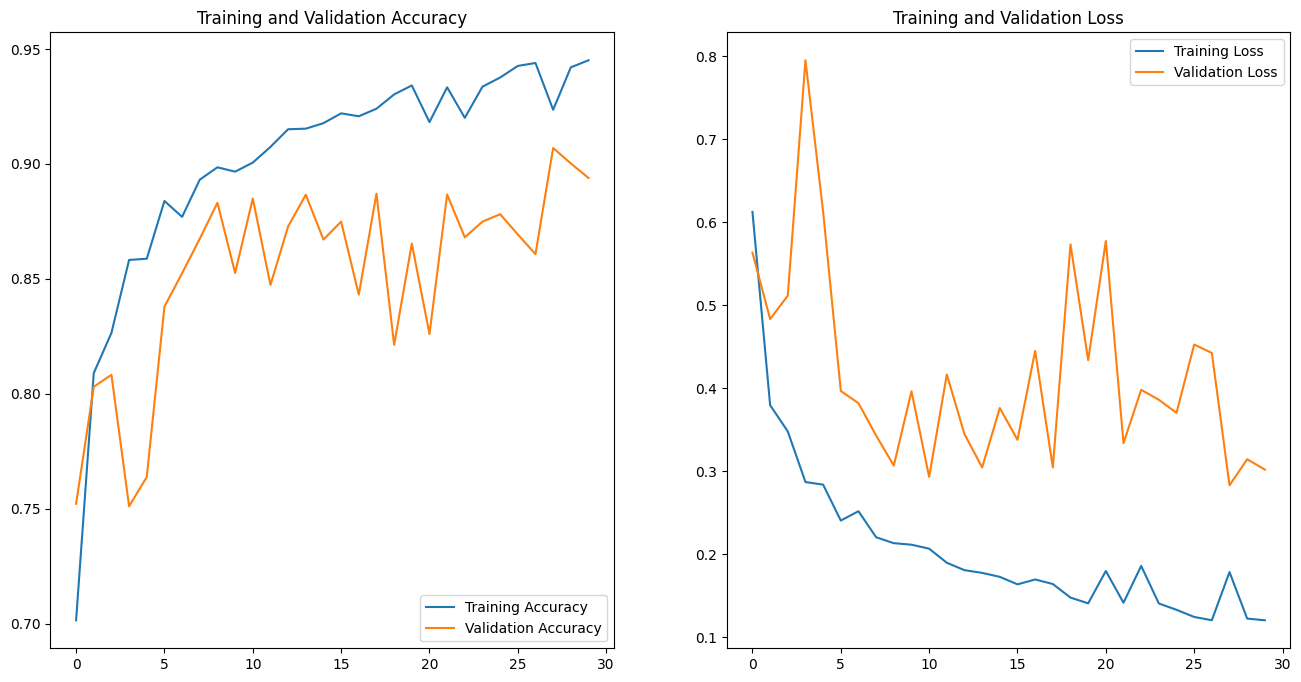

In [22]:
# plot_history(history0_01)
plot_history(history1, 30)

--> The provided plots illustrate the performance of our model during training, showcasing the training and validation accuracy and loss across several epochs. While the training accuracy improves and the training loss decreases, the widening gap between the training and validation metrics suggests a potential overfitting issue. 

This indicates that our model may be memorizing the training data rather than learning generalizable patterns. To address this, we will optimize the hyperparameters later.

In [24]:
model1.save('model1(08102024).keras')

We use `model1.save('model1(08102024).keras')` to save the trained model in a file in `.keras` format.

By saving the model, we can easily reload it and use it later, without having to re-train it. This is particularly useful for projects where the model needs to be reused for future predictions or shared with other users.

In [ ]:
# model = tf.keras.models.load_model('model-03-10-24-overfit.h5')

We now perform the predictions. With `test_predictions = model1.predict(test_set)`, we run the model on the test set to generate predictions. Each test_set sample is run through the model, and the output generated is stored in the variable test_predictions. These predictions can then be analyzed to assess the model's performance on data it has never seen before.

In [25]:
test_predictions = model1.predict(test_set)


252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


## Confusion Matrix
The confusion matrix is a performance evaluation tool for classification models. It presents a table where each row represents the instances of the actual class, and each column represents the instances of the predicted class. It helps identify specific classification errors, such as false positives (incorrect predictions) and false negatives. A confusion matrix thus provides a better understanding of how a model performs for each class individually.

We create the function `plot_confusion_matrix` which takes as input the test data, the predictions, and the class labels. This function calculates the matrix

In [21]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(test_set, test_predictions, class_labels):
    y_true = []
    y_pred = []
    for images, labels in test_set:
        y_true.extend(labels.numpy())
    y_true = np.argmax(y_true, axis=1)
    y_pred = np.argmax(test_predictions, axis=1)
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    

# plot_confusion_matrix(test_set, test_predictions, class_labels)

## Visualizing predictions

The `plot_predictions` function takes as input a dataset, a list of class names, and predictions, and displays the images along with the predicted labels.

In [22]:
def plot_predictions(dataset, class_names, predictions, batch=1):
    plt.figure(figsize=(15, 15))
    # Take the specified batch from the dataset
    for images, labels in dataset.skip(batch-1).take(1):  # Skip to the desired batch
        labels = labels.numpy()  # Convert tensor labels to numpy array
        for i in range(len(images)):  # Loop through the batch
            ax = plt.subplot(6, 6, i + 1)  # Create a subplot for each image    
            plt.imshow(images[i].numpy().astype("uint8"))  # Show the image   
            # Determine the color of the title (green if prediction is correct, red otherwise)
            color = "green" if np.argmax(labels[i]) == np.argmax(predictions[i + (batch-1)*32]) else "red" 
            # Display the actual and predicted class
            plt.title(f'Actual: {class_names[np.argmax(labels[i])]}\nPredicted: {class_names[np.argmax(predictions[i + (batch-1)*32])]}', color=color)
            plt.axis("off")  # Hide the axis

    plt.show()


# plot_predictions(test_set, class_labels, test_predictions)

# Hyperparameters optimization

**Hyperparameter Tuning in AI and TensorFlow**

Hyperparameter tuning is a crucial step in developing effective machine learning models. It involves selecting the best set of hyperparameters that optimize a model’s performance. In the context of TensorFlow, a widely-used machine learning framework, hyperparameter tuning can significantly enhance the performance of neural networks and other models by systematically exploring different configurations.

---

### **1. What is Hyperparameter Tuning in AI and Specifically in TensorFlow?**

**Hyperparameters vs. Parameters:**
- **Parameters:** These are the internal variables of the model (e.g., weights and biases in a neural network) that are learned during the training process.
- **Hyperparameters:** These are external configurations set before training (e.g., learning rate, number of layers, number of neurons per layer, batch size) that govern the training process and model architecture.

**Hyperparameter Tuning:**
- **Objective:** To find the set of hyperparameters that yield the best performance for a given model on a specific task.
- **Process:** Involves searching through a predefined hyperparameter space using various strategies to identify the optimal combination.

**In TensorFlow:**
- TensorFlow, especially when used with Keras, provides tools like **Keras Tuner** to facilitate hyperparameter tuning.
- **Keras Tuner** simplifies the process by offering different tuning algorithms, allowing you to define hyperparameter search spaces, and managing the search process.

---

### **2. Tuners Available in TensorFlow (via Keras Tuner)**

**Keras Tuner** offers several tuners, each utilizing different search strategies to navigate the hyperparameter space effectively:

1. **RandomSearch:**
   - **Description:** Samples hyperparameters randomly from the defined search space.
   - **Use Case:** Simple and effective for smaller search spaces or when computational resources are limited.

2. **Hyperband:**
   - **Description:** An advanced method that combines random search with adaptive resource allocation and early stopping.
   - **Use Case:** Efficient for large hyperparameter spaces and when you want to allocate resources dynamically based on performance.

3. **BayesianOptimization:**
   - **Description:** Uses probabilistic models to predict the performance of hyperparameters and selects the next set of hyperparameters based on these predictions.
   - **Use Case:** Effective for scenarios where you want to balance exploration and exploitation, especially when evaluations are expensive.

4. **Sklearn Tuner:**
   - **Description:** Integrates scikit-learn’s hyperparameter tuning methods with Keras models.
   - **Use Case:** Useful if you prefer scikit-learn’s tuning methods like GridSearchCV or RandomizedSearchCV.

**Choosing the Right Tuner:**
- **RandomSearch:** Quick and easy, suitable for initial explorations.
- **Hyperband:** Best for efficient resource utilization, especially with limited computational budgets.
- **BayesianOptimization:** Ideal when you need a more informed search strategy based on previous evaluations.

---

### **3. The Hyperband Tuner in TensorFlow: What It Is and How It Works**

**Overview of Hyperband:**
Hyperband is a state-of-the-art hyperparameter optimization algorithm that efficiently allocates resources (like training epochs) to different hyperparameter configurations. It builds upon the Successive Halving algorithm to perform hyperparameter tuning in a resource-efficient manner.

**Key Concepts:**

- **Successive Halving (SH):** Starts with a large number of hyperparameter configurations and allocates a small amount of resources to each. The worst-performing half of the configurations are then discarded, and the remaining half receive more resources. This process repeats until the best configuration is identified.

- **Bracket:** Hyperband runs multiple Successive Halving processes (brackets) with different initial resource allocations, allowing it to explore a diverse set of hyperparameter configurations.

**How Hyperband Works:**

1. **Define Maximum Resources (`max_epochs`):**
   - The maximum amount of resources (e.g., epochs) allocated to any single hyperparameter configuration.

2. **Define a Reduction Factor (`factor`):**
   - Determines how aggressively Hyperband reduces the number of configurations in each round. A common choice is `factor=3`.

3. **Multiple Brackets:**
   - Hyperband runs several brackets, each corresponding to a different initial number of configurations and resource allocations.

4. **Successive Halving within Each Bracket:**
   - For each bracket, Hyperband starts with a set of hyperparameter configurations and allocates a small amount of resources.
   - After each round, it keeps the top-performing configurations and allocates more resources to them.
   - This continues until the maximum resource is reached or only one configuration remains.

5. **Final Selection:**
   - After all brackets have been processed, Hyperband selects the best-performing hyperparameter configuration across all brackets.

**Advantages of Hyperband:**

- **Efficiency:** Allocates resources dynamically, focusing more on promising configurations.
- **Scalability:** Can handle large hyperparameter spaces effectively.
- **Automation:** Reduces the need for manual intervention in resource allocation.

**Using Hyperband in TensorFlow (Keras Tuner):**

Here's a step-by-step guide to implementing Hyperband using Keras Tuner in TensorFlow:

1. **Install Keras Tuner (if not already installed):**
   ```bash
   pip install keras-tuner
   ```

2. **Import Necessary Libraries:**
   ```python
   import tensorflow as tf
   from tensorflow import keras
   from tensorflow.keras import layers
   from kerastuner import Hyperband
   ```

3. **Define the Model-Building Function:**
   This function includes the hyperparameters you want to tune.
   ```python
   def build_model(hp):
       model = keras.Sequential()
       model.add(layers.Dense(
           units=hp.Int('units', min_value=32, max_value=512, step=32),
           activation='relu'))
       model.add(layers.Dense(10, activation='softmax'))
       
       model.compile(
           optimizer=keras.optimizers.Adam(
               hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
       return model
   ```

4. **Instantiate the Hyperband Tuner:**
   ```python
   tuner = Hyperband(
       build_model,
       objective='val_accuracy',
       max_epochs=50,
       factor=3,
       directory='my_dir',
       project_name='hyperband_tuning'
   )
   ```

   - **Parameters:**
     - `build_model`: The model-building function.
     - `objective`: The metric to optimize (e.g., validation accuracy).
     - `max_epochs`: Maximum number of epochs to train each model.
     - `factor`: Reduction factor for resource allocation.
     - `directory`: Directory to save tuning results.
     - `project_name`: Name of the tuning project.

5. **Set Up Early Stopping (Optional but Recommended):**
   ```python
   stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
   ```

6. **Run the Hyperparameter Search:**
   ```python
   tuner.search(
       x_train, y_train,
       epochs=50,
       validation_data=(x_val, y_val),
       callbacks=[stop_early]
   )
   ```

7. **Retrieve the Best Hyperparameters:**
   ```python
   best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
   
   print(f"""
   The optimal number of units in the first layer is {best_hps.get('units')} and the optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
   """)
   ```

8. **Build and Train the Final Model:**
   ```python
   model = tuner.hypermodel.build(best_hps)
   history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val))
   ```

**Visual Representation:**

Hyperband can be visualized as multiple parallel Successive Halving processes (brackets) running with different starting points, effectively covering various trade-offs between exploration (trying many configurations with fewer resources) and exploitation (focusing on fewer configurations with more resources).

---

### **Conclusion**

Hyperparameter tuning is essential for maximizing the performance of machine learning models. TensorFlow, through Keras Tuner, offers powerful tools like Hyperband to streamline this process. The Hyperband tuner intelligently balances exploration and exploitation by dynamically allocating resources to promising hyperparameter configurations, making it both efficient and effective for complex models and large hyperparameter spaces.

By leveraging Hyperband in TensorFlow, you can automate the search for optimal hyperparameters, leading to better-performing models with less manual effort. Whether you're working on deep learning, neural networks, or other machine learning tasks, understanding and utilizing Hyperband can significantly enhance your model development workflow.

In [23]:

def build_model(hp):
    model = Sequential()
    # l1 regularization
    l1_lambda = hp.Choice('l1_lambda', [0.01, 0.001, 0.0001])
    # l2 regularization
    l2_lambda = hp.Choice('l2_lambda', [0.01, 0.001, 0.0001])
    # conditional data augmentation
    # if hp.Boolean('data_augmentation'):
    model.add(data_augmentation)
        
    model.add(layers.Rescaling(1./255, input_shape=(image_h, image_w, 3)))
    
    # convolutional layers
    n_conv_layers = hp.Int('n_conv_layers', 1, 5, 1)
    for i in range(1, n_conv_layers+1):
        model.add(layers.Conv2D(
            filters=2**(i+3),
            kernel_size=(3, 3),
            padding='same',
            activation='relu',
            strides=(2, 2),
            kernel_regularizer=regularizers.l1_l2(l1=l1_lambda, l2=l2_lambda)
        ))
        model.add(layers.MaxPooling2D(padding='same', pool_size=(2, 2)))
        
    # dropout layer
    model.add(layers.Dropout(hp.Float('dropout', 0.0, 0.5, 0.1)))
    
    # flatten layer
    model.add(layers.Flatten())
    
    # dense layers
    n_neurons = hp.Int('n_neurons', 64, 512, 64)
    model.add(layers.Dense(n_neurons, activation='relu',
            kernel_regularizer=regularizers.l1_l2(l1=l1_lambda, l2=l2_lambda)))
    
    
    model.add(layers.Dense(5, activation='softmax',
            kernel_regularizer=regularizers.l1_l2(l1=l1_lambda, l2=l2_lambda)))

    model.compile(
                    optimizer=tf.keras.optimizers.Adam(
                        hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'],
                  )
    
    return model

In [24]:
import keras_tuner as kt

tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=15,
    factor=3,
    directory='my_dir',
    project_name='GPU_photo_classification_30e_l2'
)

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

Reloading Tuner from my_dir/GPU_photo_classification_30e_l2/tuner0.json


We initializes a Hyperband tuner to optimize the model’s hyperparameters for classification. The `kt.Hyperband` function takes the model-building function, the optimization objective (`val_accuracy`), the maximum number of epochs for each trial, the directory to store results, and the project name as inputs. 

The `stop_early` variable uses an `EarlyStopping` callback to halt training if the validation loss doesn’t improve for 5 consecutive epochs, helping to prevent overfitting.

In [26]:
tuner.search(
    train_set,
    validation_data=test_set,
    epochs=5,
    callbacks=[stop_early, tensorboard_callback]
)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In this block, the `tuner.search()` method is used to search for the best hyperparameters using the training and validation datasets. The callbacks `stop_early` and `tensorboard_callback` (not defined here but assumed to be declared elsewhere) are included to monitor the training. 

The `tuner.get_best_hyperparameters` method is then used to retrieve the best configuration, and `print(best_hps.values)` displays the values of the best-found hyperparameters.

In [27]:
print(best_hps.values)

{'l2_lambda': 0.0001, 'data_augmentation': False, 'n_conv_layers': 5, 'dropout': 0.1, 'n_neurons': 384, 'learning_rate': 0.001, 'tuner/epochs': 15, 'tuner/initial_epoch': 5, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0012'}


In [30]:
# set best hyperparameters 'data_augmentation' to True
# best_hps.values['data_augmentation'] = True
model = tuner.hypermodel.build(best_hps)
model.summary()
history = model.fit(train_set, validation_data=test_set, epochs=30, class_weight=class_weight_dict)
# 17min

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 120, 120, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 15, 15, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 4, 4, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 1, 1, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 1, 1, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 384)            │        98,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │         1,925 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 493,221 (1.88 MB)

 Trainable params: 493,221 (1.88 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4778 - loss: 1.0456 - val_accuracy: 0.6861 - val_loss: 0.6514
Epoch 2/30
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7268 - loss: 0.5150 - val_accuracy: 0.7809 - val_loss: 0.5321
Epoch 3/30
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7950 - loss: 0.4192 - val_accuracy: 0.8153 - val_loss: 0.4405
Epoch 4/30
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8229 - loss: 0.3805 - val_accuracy: 0.8205 - val_loss: 0.4242
Epoch 5/30
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8550 - loss: 0.3060 - val_accuracy: 0.8716 - val_loss: 0.3494
Epoch 6/30
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8578 - loss: 0.3256 - val_accuracy: 0.8599 - val_loss: 0.3763
Epoch 7/30
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8843 - loss: 0.2646 - val_accuracy: 0.8559 - val_loss: 0.3692
Epoch 8/30
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8638 - loss: 0.3216 - 

This part shows how we build and train the model using the best hyperparameters obtained earlier. 

The line `tuner.hypermodel.build(best_hps)` creates a model based on the optimal configuration, and `model.fit()` trains the model for 30 epochs using the training and validation datasets, with class weights to address potential class imbalance. 

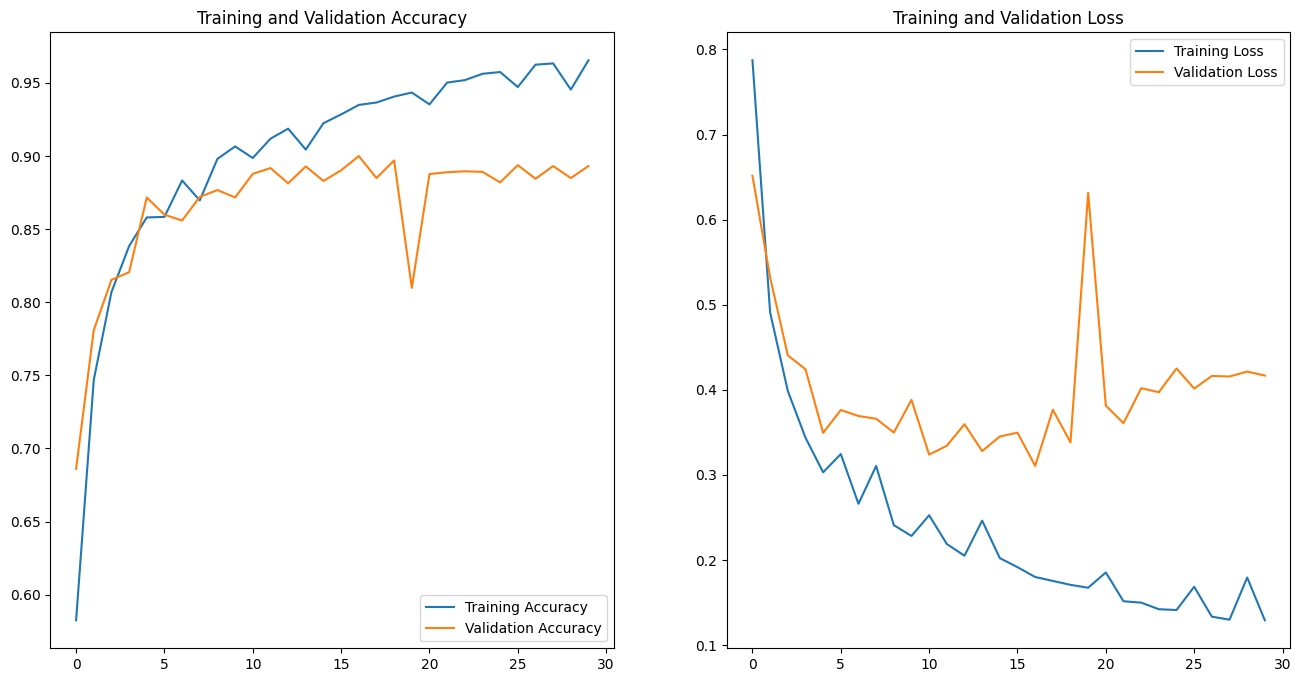

In [32]:
# plot the history
plot_history(history, 30)

In this section, we visualize the model’s training history using the `plot_history` function, which plots both accuracy and loss over 30 epochs. The left graph shows the training and validation accuracy, where we can observe the model’s performance improving as it learns from the data. Meanwhile, the right graph displays the training and validation loss, providing insight into how well the model generalizes to new data and whether there is any sign of overfitting.

252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


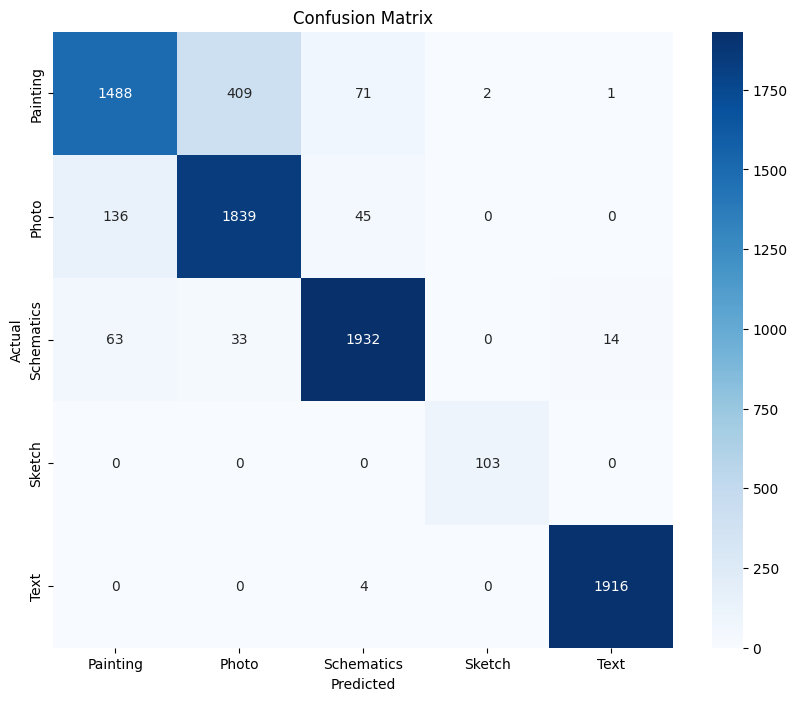

In [34]:
predictions = model.predict(test_set)

plot_confusion_matrix(test_set, predictions, class_labels)

Here, we generate predictions on the test set and use them to plot a confusion matrix with the `plot_confusion_matrix` function. This matrix provides a detailed look at how well the model is performing across each class by showing the counts of true and predicted labels. 

We can identify specific misclassifications and understand which classes are causing the most errors. By studying this matrix, we gain a better understanding of the model's strengths and weaknesses across different categories.

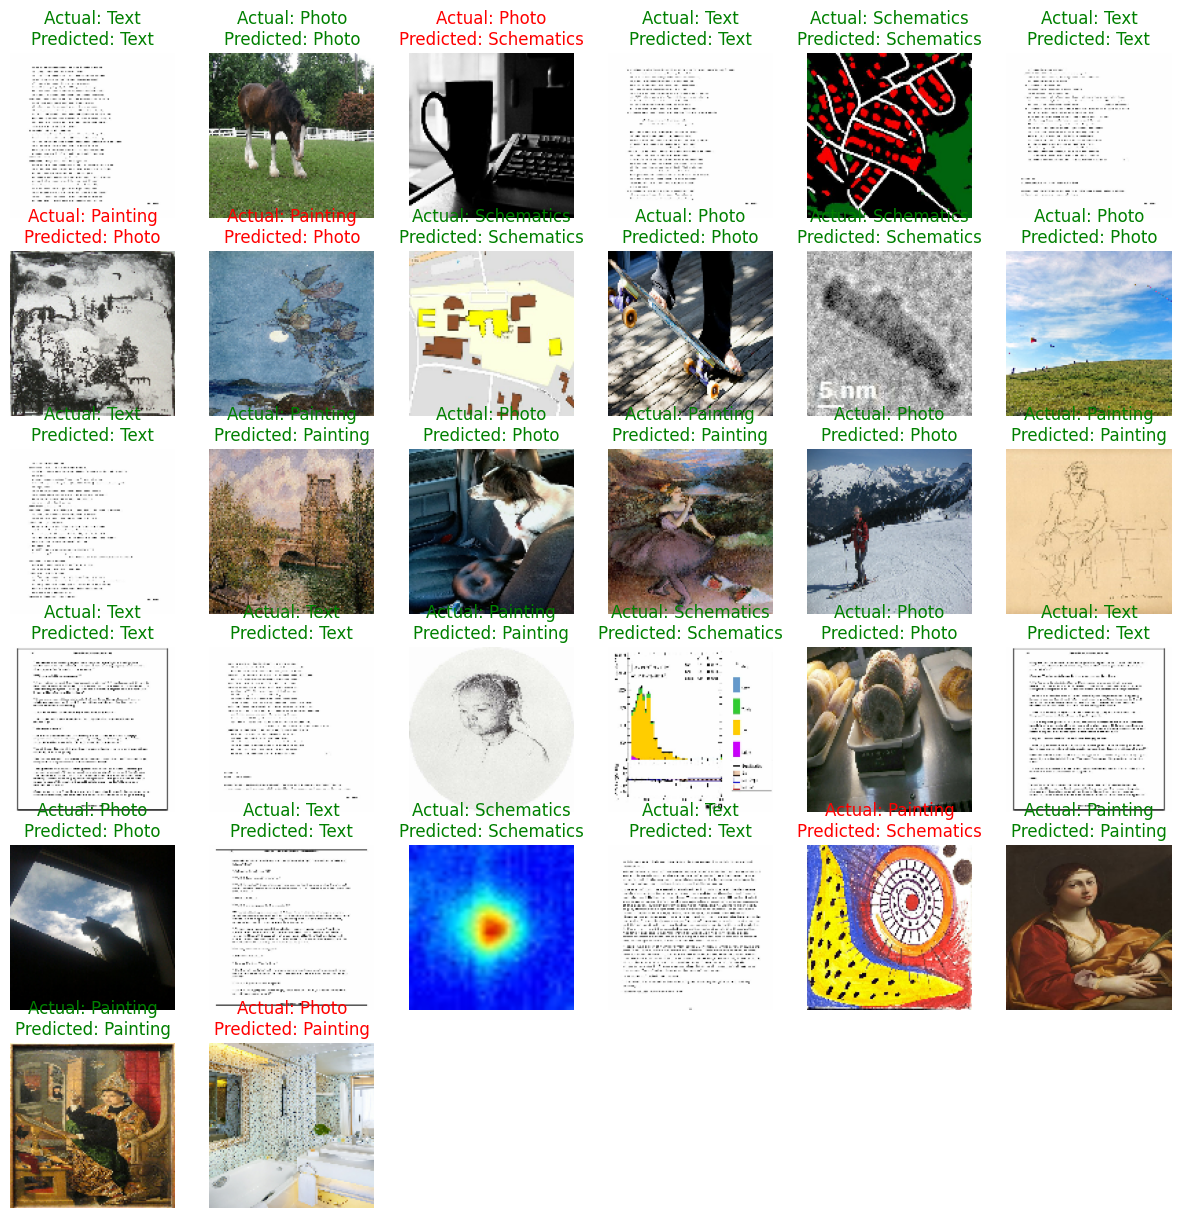

In [36]:
plot_predictions(test_set, class_labels, predictions, 2)

In [39]:
%load_ext tensorboard
%tensorboard --logdir=logs/hparam_tuning

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6007 (pid 60033), started 0:00:05 ago. (Use '!kill 60033' to kill it.)

Finally, we load TensorBoard within the notebook environment by running the commands `%load_ext tensorboard` and `%tensorboard --logdir=logs/hparam_tuning`. TensorBoard is a powerful tool that allows us to monitor training metrics, visualize model graphs, and analyze hyperparameter tuning in real-time. 

By specifying the log directory, we ensure that TensorBoard reads the training logs for hyperparameter tuning, enabling us to explore and interpret our model’s behavior in depth.

## References
https://datascientest.com/en/convolutional-neural-network-everything-you-need-to-know 
https://www.natural-solutions.eu/blog/la-reconnaissance-dimage-avec-les-rseaux-de-neurones-convolutifs#:~:text=Qu'est%2Dce%20que%20la,%C3%A0%20la%20reconnaissance%20d'image. 